In [409]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
df = pd.read_csv('EV_train.csv')
X_test = pd.read_csv('EV_X_test.csv')
df.head()

,BuyEV,PriceBudgetRatio,range,HomeSlowChgWalkTime,WorkSlowChgWalkTime,FastChgTime,TownToFastChgDriveTime,HwyFastChgDistance,gender,race,...,used,NextCarBudget,PopDensity,orphan,ev_owner,priceshow,zip_median_home_value,state_elec_price,state_high_temp,state_precip
0,1,0.70,400,10,2,60,5,50,1,White,...,0,50000,72.60456,1,0,35000,239600,12.40,66.9,45.8
1,1,0.70,400,20,1,15,10,50,1,White,...,1,5000,139.79620,1,0,3500,117100,10.56,67.2,50.4
2,0,0.70,100,5,5,5,5,70,0,White,...,0,30000,476.37790,1,0,21000,151300,13.16,75.3,11.6
3,1,0.85,100,0,5,60,5,70,0,White,...,1,15000,166.24060,1,0,12750,93000,14.38,59.7,45.0
4,0,1.00,300,3,5,15,no,30,1,White,...,1,10000,4420.04400,1,0,10000,85900,16.07,55.0,33.9


In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuyEV                   4718 non-null   int64  
 1   PriceBudgetRatio        4718 non-null   float64
 2   range                   4718 non-null   int64  
 3   HomeSlowChgWalkTime     4718 non-null   int64  
 4   WorkSlowChgWalkTime     4718 non-null   int64  
 5   FastChgTime             4718 non-null   int64  
 6   TownToFastChgDriveTime  4718 non-null   object 
 7   HwyFastChgDistance      4718 non-null   object 
 8   gender                  4718 non-null   int64  
 9   race                    4718 non-null   object 
 10  state                   4718 non-null   object 
 11  license                 4718 non-null   object 
 12  edu                     4718 non-null   int64  
 13  employment              4718 non-null   int64  
 14  hsincome                4718 non-null   

In [412]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PriceBudgetRatio        1180 non-null   float64
 1   range                   1180 non-null   int64  
 2   HomeSlowChgWalkTime     1180 non-null   int64  
 3   WorkSlowChgWalkTime     1180 non-null   int64  
 4   FastChgTime             1180 non-null   int64  
 5   TownToFastChgDriveTime  1180 non-null   object 
 6   HwyFastChgDistance      1180 non-null   object 
 7   gender                  1180 non-null   int64  
 8   race                    1180 non-null   object 
 9   state                   1180 non-null   object 
 10  license                 1180 non-null   object 
 11  edu                     1180 non-null   int64  
 12  employment              1180 non-null   int64  
 13  hsincome                1180 non-null   int64  
 14  hhsize                  1180 non-null   

In [413]:
# check duplicates
df.duplicated().sum()

0

In [414]:
# check missing values
df.isnull().sum()

BuyEV                        0
PriceBudgetRatio             0
range                        0
HomeSlowChgWalkTime          0
WorkSlowChgWalkTime          0
FastChgTime                  0
TownToFastChgDriveTime       0
HwyFastChgDistance           0
gender                       0
race                         0
state                        0
license                      0
edu                          0
employment                   0
hsincome                     0
hhsize                       0
housit                       0
residence                    0
move                         0
all_car                      0
new_car                      0
ev                           0
new_ev                       0
home_parking              2705
hp2                       4253
hp3                       2452
hp4                       4071
hp5                       4170
hp6                       4633
HomeChgAvai                  0
work_parking                 0
WorkChgAvai                  0
buycar  

In [415]:
# check the number of unique values or categories of each column
for col_name in df.columns:
    unique_cat, name = len(df[col_name].unique()), df[col_name].unique()
    print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'BuyEV' has 2 unique categories
Feature 'PriceBudgetRatio' has 3 unique categories
Feature 'range' has 4 unique categories
Feature 'HomeSlowChgWalkTime' has 7 unique categories
Feature 'WorkSlowChgWalkTime' has 7 unique categories
Feature 'FastChgTime' has 4 unique categories
Feature 'TownToFastChgDriveTime' has 4 unique categories
Feature 'HwyFastChgDistance' has 4 unique categories
Feature 'gender' has 2 unique categories
Feature 'race' has 7 unique categories
Feature 'state' has 49 unique categories
Feature 'license' has 2 unique categories
Feature 'edu' has 8 unique categories
Feature 'employment' has 6 unique categories
Feature 'hsincome' has 9 unique categories
Feature 'hhsize' has 5 unique categories
Feature 'housit' has 4 unique categories
Feature 'residence' has 7 unique categories
Feature 'move' has 3 unique categories
Feature 'all_car' has 4 unique categories
Feature 'new_car' has 4 unique categories
Feature 'ev' has 4 unique categories
Feature 'new_ev' has 2 unique 

In [416]:
# examine frequency and relative frequency table of each column excluding the following

# Get a list of column names excluding specified columns
col_names = [col for col in df.columns if col not in ['zip_median_home_value', 'state_elec_price', 
                                                      'state_high_temp', 'state_precip', 'PopDensity', 
                                                      'zipcode']]

for column in col_names:
    print(f"Column: {column}")
    
    # Frequency table
    freq_table = df[column].value_counts()
    
    # Relative frequency table
    rel_freq_table = df[column].value_counts(normalize=True)
    
    # Combine both tables
    combined_table = pd.DataFrame({'Frequency': freq_table, 
                                 'Relative Frequency': rel_freq_table})
    print(combined_table)
    print("\n")


Column: BuyEV
   Frequency  Relative Frequency
1       2611            0.553412
0       2107            0.446588


Column: PriceBudgetRatio
      Frequency  Relative Frequency
0.85       1606            0.340398
1.00       1580            0.334888
0.70       1532            0.324714


Column: range
     Frequency  Relative Frequency
300       1255            0.266003
400       1171            0.248198
100       1155            0.244807
200       1137            0.240992


Column: HomeSlowChgWalkTime
    Frequency  Relative Frequency
1         705            0.149428
20        701            0.148580
0         698            0.147944
10        691            0.146460
5         689            0.146036
2         627            0.132895
3         607            0.128656


Column: WorkSlowChgWalkTime
    Frequency  Relative Frequency
5         710            0.150487
20        689            0.146036
2         681            0.144341
3         678            0.143705
1         670          

### Preliminary Data Preprocessing

#### Preprocess 'TownToFastChgDriveTime'
- replace 'no' with 100 and convert to int64

In [417]:
# Create a mapping dictionary for ordinal encoding
ordinal_mapping = {'5': 5, '10': 10, '15': 15, 'no': 100}

# Replace the values in the 'town' column with the ordinal encoding
df['TownToFastChgDriveTime'] = df['TownToFastChgDriveTime'].replace(ordinal_mapping)
X_test['TownToFastChgDriveTime'] = X_test['TownToFastChgDriveTime'].replace(ordinal_mapping)

#### Preprocess 'HwyFastChgDistance'
- replace 'no' with 200 and convert to int64

In [418]:
# Create a mapping dictionary for ordinal encoding
ordinal_mapping = {'30': 30, '50': 50, '70': 70, 'no': 200}

# Replace the values in the 'town' column with the ordinal encoding
df['HwyFastChgDistance'] = df['HwyFastChgDistance'].replace(ordinal_mapping)
X_test['HwyFastChgDistance'] = X_test['HwyFastChgDistance'].replace(ordinal_mapping)

#### Preprocessing 'hp6'
- merge 'American Indian or Alaska Native', 'Another race', 'Native Hawaiian or other Pacific Islander' to 'other'
- merge ''Black or African American' to 'Black'
- Apply one-hot encoding

In [419]:
# Replace specified categories with 'Others'
categories_to_merge = ['Another race', 'Native Hawaiian or other Pacific Islander',
                       'American Indian or Alaska Native', 'Prefer not to answer']
df['race'] = df['race'].replace(categories_to_merge, 'Others')
X_test['race'] = X_test['race'].replace(categories_to_merge, 'Others')

df['race'] = df['race'].replace('Black or African American', 'Black')
X_test['race'] = X_test['race'].replace('Black or African American', 'Black')

In [420]:
# Apply one-hot encoding to the 'race' column
df = pd.get_dummies(df, columns=['race'], prefix='race')
X_test = pd.get_dummies(X_test, columns=['race'], prefix='race')

#### Preprocessing 'state'
- Merge low-frequency states with neighboring states.
    - 'Alabama', 'Mississippi', 90+60
    - 'Alaska', 'Idaho', 'Montana', 'South Dakota', 'Wyoming', 18+36+18+12+12
    - 'Arizona', 'New Mexico', 186+12
    - 'Arkansas', 'Louisiana', 36+84
    - 'California', 'Hawaii', 462
    - 'Colorado', 'Utah', 60+30
    - 'Connecticut', 'Massachusetts', 'Rhode Island', 60+138+42
    - 'Delaware', 'Maryland', 6+78
    - 'Florida', 522
    - 'Georgia', 162
    - 'Illinois', 246
    - 'Indiana', 162
    - 'Iowa', 'Nebraska', 54+48
    - 'Kansas', 'Missouri', 'Oklahoma', 48+150+60
    - 'Kentucky', 'West Virginia', 72+48
    - 'Maine', 'New Hampshire', 'Vermont', 24+30+12
    - 'Michigan', 216
    - 'Minnesota', 'Wisconsin', 96+90
    - 'Nevada', 96
    - 'New Jersey', 90
    - 'New York', 180
    - 'North Carolina', 258
    - 'Ohio', 192
    - 'Oregon', 144
    - 'Pennsylvania', 324
    - 'South Carolina', 72
    - 'Tennessee', 168
    - 'Texas', 456
    - 'Virginia', 132
    - 'Washington', 288
- Apply one-hot encoding

In [421]:
state_replacements = {
    'Alabama': 'AL+MS',
    'Mississippi': 'AL+MS',
    'Alaska': 'AK+ID+MT+SD+WY',
    'Idaho': 'AK+ID+MT+SD+WY',
    'Montana': 'AK+ID+MT+SD+WY',
    'South Dakota': 'AK+ID+MT+SD+WY',
    'Wyoming': 'AK+ID+MT+SD+WY',
    'Arizona': 'AZ+NM',
    'New Mexico': 'AZ+NM',
    'Arkansas': 'AR+LA',
    'Louisiana': 'AR+LA',
    'California': 'CA+HI',
    'Hawaii': 'CA+HI',
    'Colorado': 'CO+UT',
    'Utah': 'CO+UT',
    'Connecticut': 'CT+MA+RI',
    'Massachusetts': 'CT+MA+RI',
    'Rhode Island': 'CT+MA+RI',
    'Delaware': 'DE+MD',
    'Maryland': 'DE+MD',
    'Iowa': 'IA+NE',
    'Nebraska': 'IA+NE',
    'Kansas': 'KS+MO+OK',
    'Missouri': 'KS+MO+OK',
    'Oklahoma': 'KS+MO+OK',
    'Kentucky': 'KY+WV',
    'West Virginia': 'KY+WV',
    'Maine': 'ME+NH+VT',
    'New Hampshire': 'ME+NH+VT',
    'Vermont': 'ME+NH+VT',
    'Minnesota': 'MN+WI',
    'Wisconsin': 'MN+WI'
}

# Replace state names in the 'state' column
df['state'] = df['state'].replace(state_replacements)
X_test['state'] = X_test['state'].replace(state_replacements)

In [422]:
# Apply one-hot encoding to the 'state' column
df = pd.get_dummies(df, columns=['state'], prefix=None)
X_test = pd.get_dummies(X_test, columns=['state'], prefix=None)

#### Preprocess 'employment'
- Apply one-hot encoding

In [423]:
# Apply one-hot encoding to the 'employment' column
df = pd.get_dummies(df, columns=['employment'], prefix='employment')
X_test = pd.get_dummies(X_test, columns=['employment'], prefix='employment')

#### Preprocess 'housit'
- Merge 3 and 4
- one-hot encoding

In [424]:
# Merge categories 3 and 4 into a single category (e.g., category 3)
df['housit'] = df['housit'].replace({4: 3})
X_test['housit'] = X_test['housit'].replace({4: 3})

# Apply one-hot encoding to the 'housit' column
df = pd.get_dummies(df, columns=['housit'], prefix='housit')
X_test = pd.get_dummies(X_test, columns=['housit'], prefix='housit')

#### Preprocess 'residence'
- Merge 2 and 3 to 2; 4 and 5 to 3; and 6, 7 and 8 to 4.
- One-hot encoding

In [425]:
# Define the replacements for the 'residence' column
residence_replacements = {
    2: 2,
    3: 2,
    4: 3,
    5: 3,
    6: 4,
    7: 4,
    8: 4
}

# Replace values in the 'residence' column
df['residence'] = df['residence'].replace(residence_replacements)
X_test['residence'] = X_test['residence'].replace(residence_replacements)

# Apply one-hot encoding to the 'residence' column
df = pd.get_dummies(df, columns=['residence'], prefix='residence')
X_test = pd.get_dummies(X_test, columns=['residence'], prefix='residence')

#### Preprocess 'home_parking', 'hp2', etc.
- Handle NaN in 'home_parking', 'hp2', 'hp3', 'hp4', 'hp5', 'hp6'

In [426]:
# Handle NaN in 'home_parking', 'hp2', 'hp3', 'hp4', 'hp5', 'hp6'.

# List of columns to one-hot encode
columns_to_encode = ['home_parking', 'hp2', 'hp3', 'hp4', 'hp5', 'hp6']

# Perform one-hot encoding
for column in columns_to_encode:
    df[column] = df[column].notna().astype(int)
    X_test[column] = X_test[column].notna().astype(int)
    
    unique_cat, name = len(df[column].unique()), df[column].unique()
    print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=column, unique_cat=unique_cat))
    print("They are: '{name}".format(name=name))
    print(df[column].value_counts())
    print()

Feature 'home_parking' has 2 unique categories
They are: '[1 0]
0    2705
1    2013
Name: home_parking, dtype: int64

Feature 'hp2' has 2 unique categories
They are: '[0 1]
0    4253
1     465
Name: hp2, dtype: int64

Feature 'hp3' has 2 unique categories
They are: '[0 1]
0    2452
1    2266
Name: hp3, dtype: int64

Feature 'hp4' has 2 unique categories
They are: '[0 1]
0    4071
1     647
Name: hp4, dtype: int64

Feature 'hp5' has 2 unique categories
They are: '[0 1]
0    4170
1     548
Name: hp5, dtype: int64

Feature 'hp6' has 2 unique categories
They are: '[0 1]
0    4633
1      85
Name: hp6, dtype: int64



#### Preprocess 'work_parking'
- one-hot encoding

In [427]:
# Apply one-hot encoding to the 'work_parking' column
df = pd.get_dummies(df, columns=['work_parking'], prefix='work_parking')
X_test = pd.get_dummies(X_test, columns=['work_parking'], prefix='work_parking')

#### Preprocess 'home_chg_avail' and 'work_chg_avail'
- recode 'home_chg_avail' and 'work_chg_avail': Yes remains 1; No changed from 2 to -1; Not sure changed from 3 to 0.

In [428]:
# recode 'home_chg_avail', 'work_chg_avail'.
# Yes remains 1; No changed from 2 to -1; Not sure changed from 3 to 0.

# Define the replacement dictionary
replacement_dict = {2: -1, 3: 0}

# Replace values in columns 'X', 'Y', and 'Z' using the replacement_dict
df.replace({'HomeChgAvai': replacement_dict, 'WorkChgAvai': replacement_dict}, inplace=True)
X_test.replace({'HomeChgAvai': replacement_dict, 'WorkChgAvai': replacement_dict}, inplace=True)

print(df['HomeChgAvai'].value_counts())
print(df['WorkChgAvai'].value_counts())

-1    3665
 1     920
 0     133
Name: HomeChgAvai, dtype: int64
-1    2980
 1     962
 0     776
Name: WorkChgAvai, dtype: int64


#### Preprocessing 'zipcode'
- geographical encoding: extract the first three-digit of 'zipcode'
    - The first digit represents a group of U.S. states. 
    - The second and third digits together represent a region in that group, which is the area distribution center for the USPS.

In [429]:
# investigate 'zipcode' that shares the same first 3-digit
# Ensure all zipcodes are strings to facilitate the operations
df['zipcode'] = df['zipcode'].astype(str)
X_test['zipcode'] = X_test['zipcode'].astype(str)

# Pad 4-digit zipcodes with a leading zero
df['zipcode'] = df['zipcode'].str.zfill(5)
X_test['zipcode'] = X_test['zipcode'].str.zfill(5)

# Extract the first 3 digits of each zipcode
df['zipcode_3digits'] = df['zipcode'].str[:3].astype('int64')
X_test['zipcode_3digits'] = X_test['zipcode'].str[:3].astype('int64')

# Create a frequency table for the first three digits of the zipcodes
zipcode_3digits_frequency_table = df['zipcode_3digits'].value_counts().reset_index()
zipcode_3digits_frequency_table.columns = ['zipcode_3digits', 'count']

# Sort the frequency table by 'zipcode_2digits' in ascending order
zipcode_3digits_frequency_table = zipcode_3digits_frequency_table.sort_values(by='zipcode_3digits')

# Display the frequency table
print(zipcode_3digits_frequency_table)

     zipcode_3digits  count
410               12      4
96                14     15
170               15     10
187               16      9
182               18      9
..               ...    ...
358              992      5
360              993      5
287              995      5
308              996      5
381              997      5

[457 rows x 2 columns]


In [430]:
df = df.drop('zipcode', axis=1)
X_test = X_test.drop('zipcode', axis=1)

#### Preprocessing Numerical Features
- Identify numerical features and obtain descriptive statistics
- Plot histograms
- Compute skewness
- Apply log transform highly skewed features

In [431]:
# list of int64/float64 features with many unique values
num_features = ['zip_median_home_value', 'state_elec_price', 'state_high_temp', 'state_precip',
               'PopDensity', 'dmileage', 'gascost', 'age', 'priceshow']

df[num_features].describe()

,zip_median_home_value,state_elec_price,state_high_temp,state_precip,PopDensity,dmileage,gascost,age,priceshow
count,4.718000e+03,4718.000000,4718.000000,4718.000000,4718.000000,4718.000000,4718.000000,4718.000000,4718.000000
mean,2.062592e+05,13.560549,67.056571,39.778042,2986.998202,24.866469,93.325562,40.321111,19305.532005
std,1.336743e+05,3.416459,8.868069,12.521995,7263.438621,20.539242,63.325150,12.182752,10173.547858
min,4.560000e+04,9.370000,35.500000,10.200000,2.337699,0.000000,0.000000,19.000000,3500.000000
25%,1.228000e+05,11.360000,59.700000,28.600000,306.457300,10.000000,50.000000,31.000000,10500.000000
50%,1.676000e+05,12.400000,66.000000,43.500000,1287.688000,20.000000,80.000000,37.000000,17500.000000
75%,2.398000e+05,14.380000,75.300000,49.100000,3542.817000,30.000000,120.000000,48.000000,25500.000000
max,1.000001e+06,32.760000,81.900000,59.700000,128440.800000,100.000000,300.000000,76.000000,50000.000000


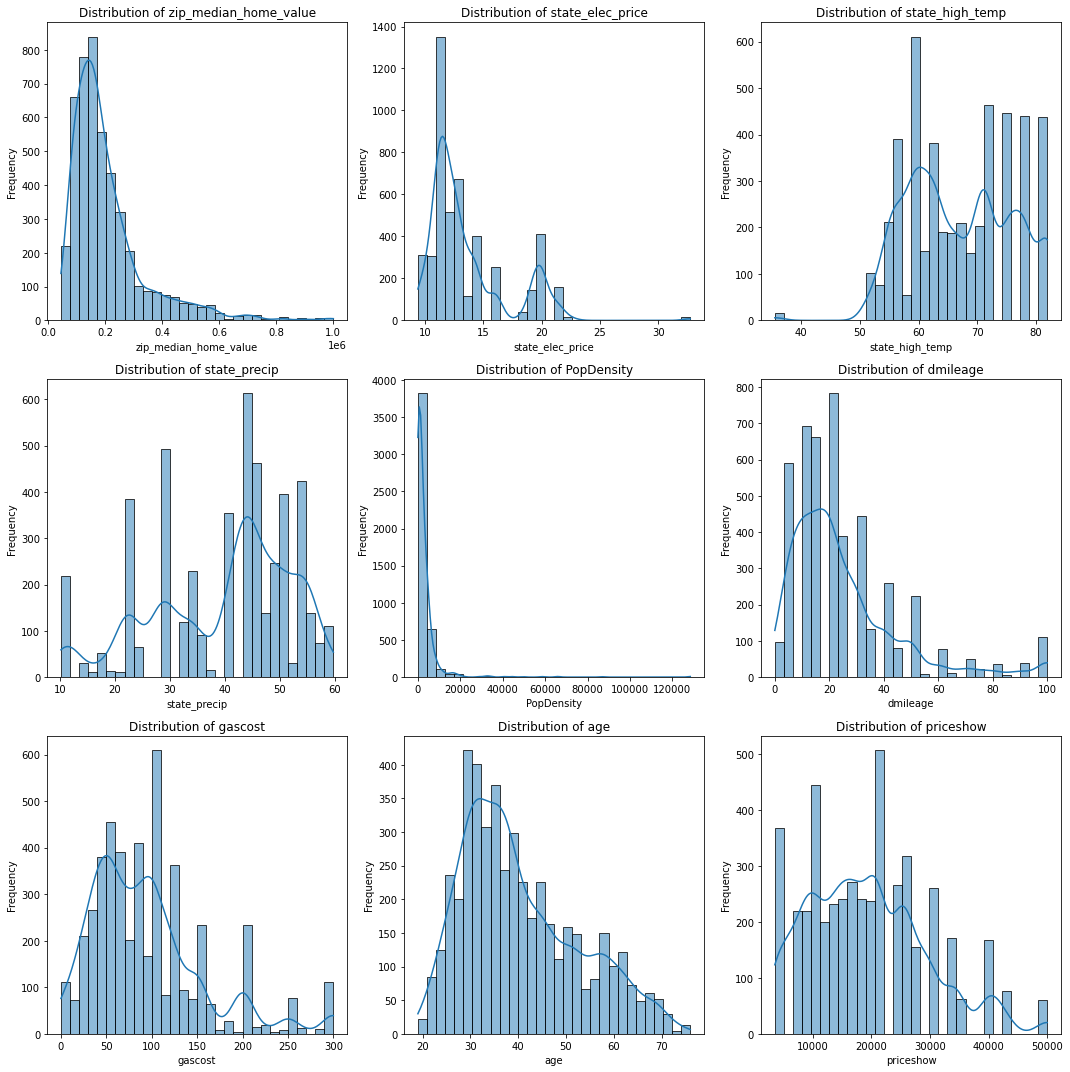

In [432]:
# histogram plots of num_features

# Set up a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the array of axes to iterate over it
axes = axes.flatten()

# Iterate over the list of features and the array of axes to plot each histogram
for i, feature in enumerate(num_features):
    sns.histplot(df[feature].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust the layout so that plots are not overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [433]:
from scipy.stats import skew

In [434]:
# Calculate and display skewness
skewness_values = {}
skewed_features = []

# Calculate and display skewness
for feature in num_features:
    skew_value = skew(df[feature])
    skewness_values[feature] = skew_value
    print(f"Skewness of {feature}: {skew_value}")
    
    # Check if the feature is highly skewed
    if skew_value >= 0.025:
        skewed_features.append(feature)

# Display skewed features
print(f"Highly skewed features: {skewed_features}")

Skewness of zip_median_home_value: 2.206697938821413
Skewness of state_elec_price: 1.5314551349523344
Skewness of state_high_temp: 0.03009349455570923
Skewness of state_precip: -0.6240639497580621
Skewness of PopDensity: 10.147572117660648
Skewness of dmileage: 1.7862174826842887
Skewness of gascost: 1.2481920639420636
Skewness of age: 0.6962007895414241
Skewness of priceshow: 0.6296959047881556
Highly skewed features: ['zip_median_home_value', 'state_elec_price', 'state_high_temp', 'PopDensity', 'dmileage', 'gascost', 'age', 'priceshow']


In [435]:
# Initialize a dictionary to store the number of outliers for each feature
outliers_count = {}

# Calculate and display the number of outliers based on IQR
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    num_outliers = outliers.shape[0]
    outliers_count[feature] = num_outliers
    
    print(f"Number of outliers in {feature}: {num_outliers}")

Number of outliers in zip_median_home_value: 384
Number of outliers in state_elec_price: 743
Number of outliers in state_high_temp: 15
Number of outliers in state_precip: 0
Number of outliers in PopDensity: 258
Number of outliers in dmileage: 275
Number of outliers in gascost: 223
Number of outliers in age: 13
Number of outliers in priceshow: 61


In [436]:
for feature in skewed_features:
    df[f'log_{feature}'] = np.log1p(df[feature])
    X_test[f'log_{feature}'] = np.log1p(X_test[feature])

In [437]:
# Drop these features from the dataframe
df = df.drop(skewed_features, axis=1)
X_test = X_test.drop(skewed_features, axis=1)

### Feature Selection with Independence Test

In [438]:
from scipy.stats import chi2_contingency

In [439]:
# test for independence

# Create an empty DataFrame to store the results
results = []

for feature in df.columns:
    contingency_table = pd.crosstab(df['BuyEV'], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    is_independent = p > 0.025
    results.append({'Feature': feature, 'P-Value': p, 'Independent': is_independent})

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

In [440]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', 100)

# Now, when you print the DataFrame, it will display all rows
print(results_df)

                      Feature        P-Value  Independent
0                       BuyEV   0.000000e+00        False
1            PriceBudgetRatio   4.635648e-25        False
2                       range   1.974615e-34        False
3         HomeSlowChgWalkTime   8.957663e-06        False
4         WorkSlowChgWalkTime   1.163204e-02        False
5                 FastChgTime   1.720809e-01         True
6      TownToFastChgDriveTime   1.659091e-20        False
7          HwyFastChgDistance   7.158814e-02         True
8                      gender   3.671994e-05        False
9                     license   7.778224e-01         True
10                        edu   7.338015e-04        False
11                   hsincome   7.741274e-01         True
12                     hhsize   4.877234e-07        False
13                       move   8.140691e-02         True
14                    all_car   2.609428e-02         True
15                    new_car   2.209461e-01         True
16            

In [441]:
# Get a list of independent features
independent_features = results_df.loc[results_df['Independent'] == True, 'Feature'].tolist()

# Drop these features from the dataframe
df = df.drop(columns=independent_features)
X_test = X_test.drop(columns=independent_features)

### Additional Feature Selection

In [442]:
y = df['BuyEV']
X = df.drop('BuyEV', axis=1)

In [443]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [444]:
# Initialize the estimator
estimator = RandomForestClassifier(random_state=314)

num_features_to_select = 30
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X,y)

RFE(estimator=RandomForestClassifier(random_state=314), n_features_to_select=30)

In [445]:
# Get Selected Features
selected_features = X.columns[rfe.support_]

# Get Feature Importances
feature_importances = rfe.estimator_.feature_importances_

# Creating a series with feature names and their scores
importance_series = pd.Series(feature_importances, index=selected_features)

# Sorting the series in descending order to get most important features at the top
sorted_importances = importance_series.sort_values(ascending=False)

# Displaying the sorted importances
print(sorted_importances)

log_zip_median_home_value    0.066147
log_age                      0.066078
log_PopDensity               0.063252
zipcode_3digits              0.059452
range                        0.057294
log_priceshow                0.051288
HomeSlowChgWalkTime          0.051079
WorkSlowChgWalkTime          0.048675
log_gascost                  0.047471
log_dmileage                 0.044501
TownToFastChgDriveTime       0.043802
state_precip                 0.043046
log_state_high_temp          0.042881
log_state_elec_price         0.042881
PriceBudgetRatio             0.035791
NextCarBudget                0.030845
edu                          0.030246
hhsize                       0.029966
long_dist                    0.028439
buycar                       0.018174
WorkChgAvai                  0.017493
gender                       0.011412
used                         0.011068
home_parking                 0.010562
HomeChgAvai                  0.008968
residence_3                  0.008686
orphan      

In [446]:

selected_features = sorted_importances[sorted_importances >=  0.028608].index


X_selected = X[selected_features]
X_test_selected = X_test[selected_features]

X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   log_zip_median_home_value  4718 non-null   float64
 1   log_age                    4718 non-null   float64
 2   log_PopDensity             4718 non-null   float64
 3   zipcode_3digits            4718 non-null   int64  
 4   range                      4718 non-null   int64  
 5   log_priceshow              4718 non-null   float64
 6   HomeSlowChgWalkTime        4718 non-null   int64  
 7   WorkSlowChgWalkTime        4718 non-null   int64  
 8   log_gascost                4718 non-null   float64
 9   log_dmileage               4718 non-null   float64
 10  TownToFastChgDriveTime     4718 non-null   int64  
 11  state_precip               4718 non-null   float64
 12  log_state_high_temp        4718 non-null   float64
 13  log_state_elec_price       4718 non-null   float

In [447]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [448]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

In [449]:
X_train.shape

(3774, 43)

In [450]:
scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [451]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500, 800,1000],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6]
}


xgb = XGBClassifier(random_state=42)


grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=8,
                           n_jobs=-1,
                           verbose=1)


grid_search.fit(X_train_scaled, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


best_model = grid_search.best_estimator_


pred_val = best_model.predict(X_val_scaled)
pred_test = best_model.predict(X_test_scaled)

print("Validation set accuracy: ", accuracy_score(y_val, pred_val))
print(confusion_matrix(y_val, pred_val))
print(classification_report(y_val, pred_val))

# Calculate the AUC score
auc = roc_auc_score(y_val, pred_val)
print("AUC:", auc)

Fitting 8 folds for each of 360 candidates, totalling 2880 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 1000, 'subsample': 0.6}
Best score: 0.8355487526586052
Validation set accuracy:  0.7997881355932204
[[311  99]
 [ 90 444]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       410
           1       0.82      0.83      0.82       534

    accuracy                           0.80       944
   macro avg       0.80      0.79      0.80       944
weighted avg       0.80      0.80      0.80       944

AUC: 0.7949986297615785


In [452]:
DF = pd.DataFrame(pred_test)
DF.to_csv('EV_test_pred_my4704.csv', index=False, header=False)